In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  

In [3]:
df = pd.read_csv('building_metadata.csv')

In [4]:
df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


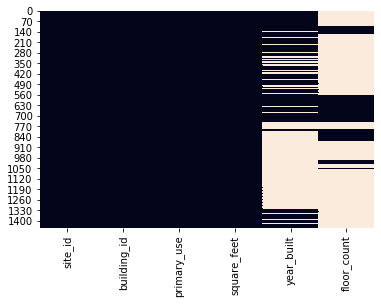

In [5]:
sns.heatmap(df.isnull(), cbar=False)

In [6]:
df.drop(['year_built', 'floor_count'], axis=1, inplace=True)

In [7]:
df.drop('site_id', axis=1, inplace=True)
df.head()

,building_id,primary_use,square_feet
0,0,Education,7432
1,1,Education,2720
2,2,Education,5376
3,3,Education,23685
4,4,Education,116607


In [8]:
df_meter = pd.read_csv('meter_dummies_final.csv')

In [9]:
df_meter.drop('timestamp', axis = 1, inplace=True)
df_meter.head()

,building_id,meter,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed
0,0,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
1,1,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
2,2,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
3,3,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
4,4,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0


In [86]:
df_meter['meter_reading'].mean()

2109.9253145465136

In [10]:
building_mean = df_meter.groupby('building_id')['meter_reading'].mean()

In [11]:
df['mean_meter'] = building_mean

In [12]:
df.head()

,building_id,primary_use,square_feet,mean_meter
0,0,Education,7432,42.925954
1,1,Education,2720,21.943047
2,2,Education,5376,4.265011
3,3,Education,23685,69.039695
4,4,Education,116607,286.228782


In [13]:
df['mean_meter'] = np.where(df['mean_meter'] >= 25000, 25000, df['mean_meter'])

In [196]:
# Continue from here to KNN Test 


In [279]:
# Test


In [9]:
#merged df's
# merged = pd.merge(df, df_meter)

In [10]:
#creates dummies for primary use category 
# merged = pd.concat([merged, pd.get_dummies(merged['primary_use'])], axis=1)

In [11]:
# merged.drop('primary_use', axis = 1, inplace=True)

In [12]:
# merged.head()

,building_id,square_feet,meter,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,0,7432,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7432,0,0.0,0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7432,0,0.0,0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,7432,0,0.0,0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,7432,0,0.0,0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# merged.drop(['building_id', 'meter'], axis = 1, inplace=True)

,square_feet,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,...,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,7432,0.0,0,1,0,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7432,0.0,0,1,1,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7432,0.0,0,1,2,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7432,0.0,0,1,3,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7432,0.0,0,1,4,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## KNN Testing 
#### Feature Engineering to break down the building sites into more manageable groups.  KNN clustering found 8 

In [14]:
df.drop(['building_id', 'primary_use'], axis=1, inplace=True)

In [15]:
df.head()

,square_feet,mean_meter
0,7432,42.925954
1,2720,21.943047
2,5376,4.265011
3,23685,69.039695
4,116607,286.228782


In [16]:
df.describe()


,square_feet,mean_meter
count,1449.000000,1449.000000
mean,92111.776398,342.204718
std,110769.950997,1363.963168
min,283.000000,0.000400
25%,23012.000000,28.545048
50%,57673.000000,84.672576
75%,115676.000000,239.155932
max,875000.000000,25000.000000


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
df_avg = df[df['mean_meter'] <= 250000]

In [19]:
df_avg.shape

(1449, 2)

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(df_avg)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_features = scaler.transform(df_avg)

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,square_feet,mean_meter
0,-0.764729,-0.219494
1,-0.807282,-0.234883
2,-0.783297,-0.247849
3,-0.617951,-0.200342
4,0.221212,-0.041053


In [24]:
kmeans = KMeans()

In [25]:
kmeans.fit(df_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.cluster_centers_

array([[ 0.11909648, -0.05363072],
       [ 0.64853343, 17.40521146],
       [ 2.91052795,  0.25362722],
       [-0.57127553, -0.19794721],
       [ 1.16230362,  0.26748664],
       [ 5.5202389 ,  9.15522126],
       [ 1.16786391,  3.01628719],
       [ 6.25276311,  0.87728421]])

In [27]:
df_avg['building_groups'] = kmeans.predict(df_feat)

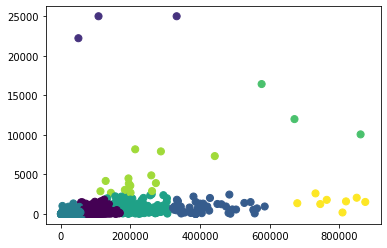

In [28]:
plt.scatter(df_avg['square_feet'], df_avg['mean_meter'], c=df_avg['building_groups'], s=50, cmap='viridis')

### DF Clustering 

In [29]:
# Using the already scaled scaler to transform the original DF now 
df_scaled_features = scaler.transform(df)

In [30]:
#New DF 
df_features = pd.DataFrame(df_scaled_features,columns=df.columns)
df_features.head()

,square_feet,mean_meter
0,-0.764729,-0.219494
1,-0.807282,-0.234883
2,-0.783297,-0.247849
3,-0.617951,-0.200342
4,0.221212,-0.041053


In [31]:
df['building_groups'] = kmeans.predict(df_features)

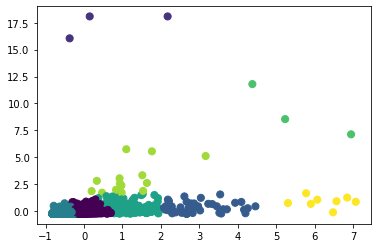

In [32]:
plt.scatter(df_features['square_feet'], df_features['mean_meter'], c=df['building_groups'], s=50, cmap='viridis')

(1449, 3)

## Final model

In [34]:
building = pd.read_csv('building_metadata.csv')

In [38]:
#merged df's
model_df = pd.merge(building, df_meter)

In [39]:
#creates dummies for primary use category 
model_df = pd.concat([model_df, pd.get_dummies(model_df['primary_use'])], axis=1)

In [40]:
model_df.drop('primary_use', axis = 1, inplace=True)

In [42]:
model_df.shape

(20216100, 34)

In [43]:
model_df.head()

,site_id,building_id,square_feet,year_built,floor_count,meter,meter_reading,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,0,0,7432,2008.0,NaN,0,0.0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,7432,2008.0,NaN,0,0.0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,7432,2008.0,NaN,0,0.0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,7432,2008.0,NaN,0,0.0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,7432,2008.0,NaN,0,0.0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
model_df = pd.merge(model_df, df)

In [45]:
model_df.head()

,site_id,building_id,square_feet,year_built,floor_count,meter,meter_reading,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage,mean_meter,building_groups
0,0,0,7432,2008.0,NaN,0,0.0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.925954,3
1,0,0,7432,2008.0,NaN,0,0.0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.925954,3
2,0,0,7432,2008.0,NaN,0,0.0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.925954,3
3,0,0,7432,2008.0,NaN,0,0.0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.925954,3
4,0,0,7432,2008.0,NaN,0,0.0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.925954,3


In [46]:
model_df.drop(['site_id', 'building_id', 'year_built', 'floor_count', 'meter', 'mean_meter'], axis=1, inplace=True)

In [53]:
model_df.shape

(20184164, 30)

In [48]:
model_df.head()

,square_feet,meter_reading,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage,building_groups
0,7432,0.0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,7432,0.0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,7432,0.0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,7432,0.0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,7432,0.0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [52]:
model_df.drop_duplicates(inplace=True)

## RF Model

In [54]:
model_df.head()

,square_feet,meter_reading,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage,building_groups
0,7432,0.0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,7432,0.0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,7432,0.0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,7432,0.0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,7432,0.0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [55]:
model_df.shape

(20184164, 30)

In [57]:
scaler_model = StandardScaler()

In [58]:
train = model_df.drop('meter_reading', axis=1)
test = model_df['meter_reading']

In [59]:
scaler_model.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
train = scaler_model.transform(train)

In [61]:
test.shape

(20184164,)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

/Users/eric/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
errors = abs(predictions - y_test)

In [91]:
predictions

array([   0.        ,  151.06406241,    0.        , ...,   90.67051431,
       6188.038     ,  178.59857985])

In [92]:
errors

1863573      0.000000
97257        0.920363
934848       0.000000
752942       0.000000
66920        2.598000
152380       5.971825
1511322     33.770000
1509998     16.884150
58788        1.270377
1509420      0.000000
515024      61.601970
518302       0.000000
1633496      0.150038
1636898      0.000000
755298       0.952279
1642755      0.000000
35046       24.197222
1872048      0.000000
455530      81.867769
1589336      0.892276
945467       0.364095
1416750      0.109913
236703       3.280961
1856094      0.000000
1382621     16.524714
232703       0.688082
695438       1.134385
1856670      0.000000
410414      16.004432
770884       0.000000
              ...    
259808       0.023899
146492       0.000000
386319       0.884253
1689174      1.376046
743885       5.447179
24907        0.192054
487574      51.564731
612828       2.155886
549824       1.900583
417898       2.781519
214398       0.000000
775167       0.292769
1437644     28.928530
142748       3.561224
1514072   

In [93]:
total = 0
count = 0

for i in errors:
    total += i
    count += 1
    
print('Average Error is : ', (total / count))

Average Error is :  67.32252937215827


In [94]:
count

200000